In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from functools import partial

In [5]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!


In [6]:
# Download Dataset from https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1
# and add it to colab

In [7]:
wagesDf = pd.read_excel("./Wages.xlsx")
# wagesDf = pd.read_excel("https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1")

In [8]:
wagesDf

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59
...,...,...,...
75,25.64,14,74
76,38.77,21,41
77,21.87,15,75
78,27.54,20,46


In [9]:
wagesDf.size

240

In [10]:
wagesDf.describe()

,Wage,Educ,Age
count,80.000000,80.000000,80.000000
mean,24.930500,13.850000,49.487500
std,7.479982,4.016107,17.213473
min,6.930000,6.000000,18.000000
25%,19.145000,10.000000,34.750000
50%,24.980000,14.000000,51.000000
75%,30.572500,17.000000,65.250000
max,43.440000,22.000000,77.000000


In [11]:
wagesDf.shape

(80, 3)

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

In [14]:
def wageModel3Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['agePower2'] = df.apply(lambda row: row['Age'] * row['Age'], axis=1)
    dfTransformer = sm.add_constant(df[['Age', 'agePower2']],has_constant='add')
    return dfTransformer

In [15]:
wagesDf['agePower2'] = wageModel3Transformer(wagesDf)['agePower2']
wagesDf

,Wage,Educ,Age,agePower2
0,17.54,12,76,5776.0
1,20.93,10,61,3721.0
2,12.94,8,75,5625.0
3,19.34,6,38,1444.0
4,24.12,12,59,3481.0
...,...,...,...,...
75,25.64,14,74,5476.0
76,38.77,21,41,1681.0
77,21.87,15,75,5625.0
78,27.54,20,46,2116.0


In [16]:
wagesDf = wagesDf.sort_values(by="Age")

In [17]:
wageModel3 = sm.OLS(
  wagesDf["Wage"],
  wageModel3Transformer(wagesDf)
)
wageModel3Fit = wageModel3.fit()
print(wageModel3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     25.72
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.79e-09
Time:                        20:41:00   Log-Likelihood:                -253.53
No. Observations:                  80   AIC:                             513.1
Df Residuals:                      77   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4664      5.569     -2.598      0.0

In [18]:
wageModel3Fit.params

const       -14.466357
Age           1.756677
agePower2    -0.017339
dtype: float64

In [19]:
predictedWage3 = wageModel3Fit.predict(wageModel3Transformer(wagesDf))
wagesDf['predictedWage3'] = predictedWage3
wagesDf

,Wage,Educ,Age,agePower2,predictedWage3
69,25.13,16,18,324.0,11.536003
27,12.39,13,19,361.0,12.651138
62,6.93,6,21,441.0,14.777375
60,18.11,14,21,441.0,14.777375
28,16.37,12,22,484.0,15.788477
...,...,...,...,...,...
48,28.95,20,75,5625.0,19.752807
77,21.87,15,75,5625.0,19.752807
67,15.38,12,76,5776.0,18.891302
0,17.54,12,76,5776.0,18.891302


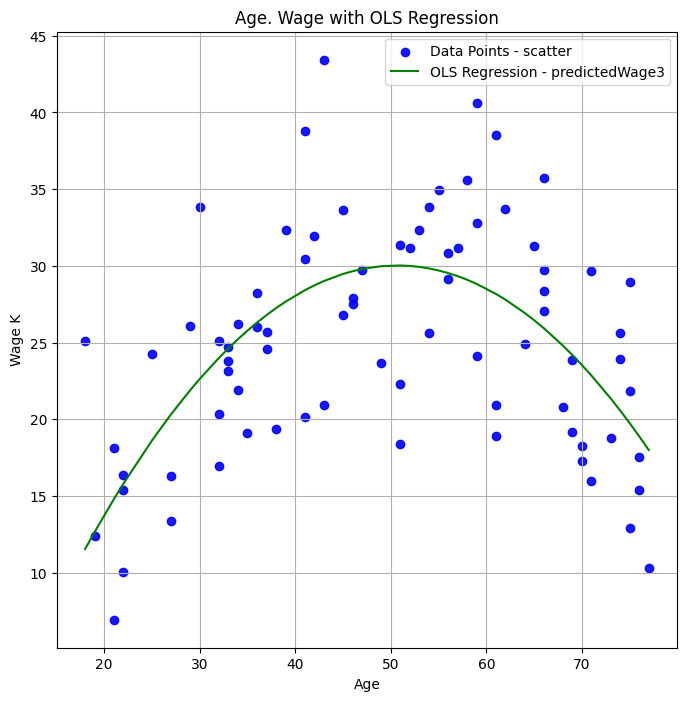

In [20]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage3"],
  color='green',
  label='OLS Regression - predictedWage3'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [21]:
wagesDf

,Wage,Educ,Age,agePower2,predictedWage3
69,25.13,16,18,324.0,11.536003
27,12.39,13,19,361.0,12.651138
62,6.93,6,21,441.0,14.777375
60,18.11,14,21,441.0,14.777375
28,16.37,12,22,484.0,15.788477
...,...,...,...,...,...
48,28.95,20,75,5625.0,19.752807
77,21.87,15,75,5625.0,19.752807
67,15.38,12,76,5776.0,18.891302
0,17.54,12,76,5776.0,18.891302


In [22]:
# Extract coefficients
coefficients = wageModel3Fit.params
intercept = coefficients['const']
slope_age = coefficients['Age']
slope_age2 = coefficients['agePower2']

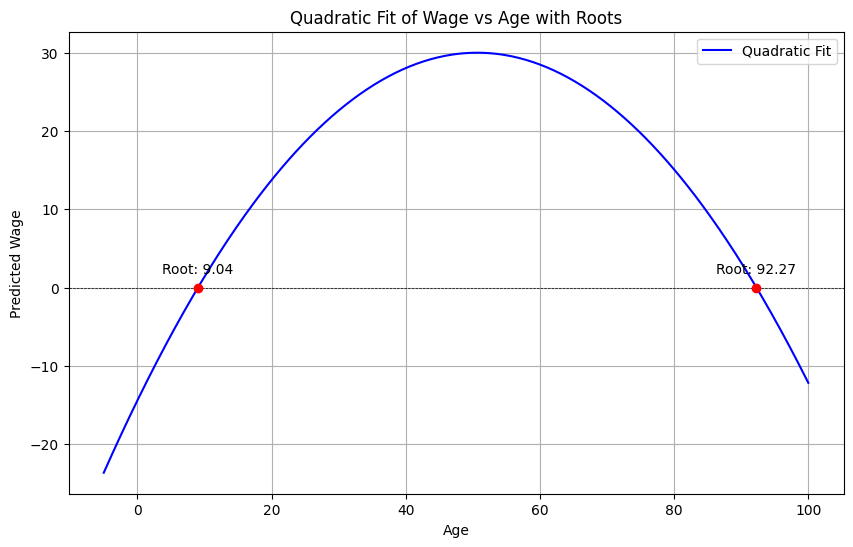

The roots of the quadratic equation are: [np.float64(9.042055881204726), np.float64(92.27185466166782)]


In [23]:


# Solve the quadratic equation
a = slope_age2
b = slope_age
c = intercept

# Calculate the discriminant
discriminant = b**2 - 4*a*c

if discriminant >= 0:
    root1 = (-b + np.sqrt(discriminant)) / (2*a)
    root2 = (-b - np.sqrt(discriminant)) / (2*a)
    roots = [root1, root2]
else:
    roots = []

# Plotting the quadratic curve and the roots
age_values = np.linspace(-5, 100, 400)
wage_predictions = intercept + slope_age * age_values + slope_age2 * (age_values**2)

plt.figure(figsize=(10, 6))
plt.plot(age_values, wage_predictions, label='Quadratic Fit', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

if roots:
    for root in roots:
        plt.plot(root, 0, 'ro')  # Plot the roots on the curve
        plt.annotate(f'Root: {root:.2f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Age')
plt.ylabel('Predicted Wage')
plt.title('Quadratic Fit of Wage vs Age with Roots')
plt.legend()
plt.grid(True)
plt.show()

print(f"The roots of the quadratic equation are: {roots}")


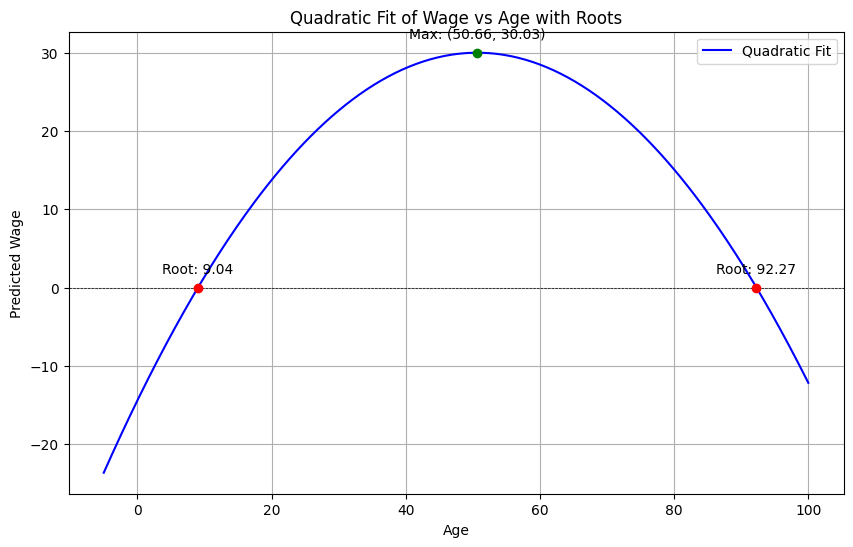

The roots of the quadratic equation are: [np.float64(9.042055881204726), np.float64(92.27185466166782)]


In [24]:


# Solve the quadratic equation
a = slope_age2
b = slope_age
c = intercept

# Calculate the discriminant
discriminant = b**2 - 4*a*c

if discriminant >= 0:
    root1 = (-b + np.sqrt(discriminant)) / (2*a)
    root2 = (-b - np.sqrt(discriminant)) / (2*a)
    roots = [root1, root2]
else:
    roots = []

# Plotting the quadratic curve and the roots
age_values = np.linspace(-5, 100, 400)
wage_predictions = intercept + slope_age * age_values + slope_age2 * (age_values**2)

plt.figure(figsize=(10, 6))
plt.plot(age_values, wage_predictions, label='Quadratic Fit', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

if roots:
    for root in roots:
        plt.plot(root, 0, 'ro')  # Plot the roots on the curve
        plt.annotate(f'Root: {root:.2f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Age')
plt.ylabel('Predicted Wage')
plt.title('Quadratic Fit of Wage vs Age with Roots')
plt.legend()

# Find the vertex (maximum point for a downward parabola)
vertex_age = -b / (2 * a)
vertex_wage = intercept + slope_age * vertex_age + slope_age2 * (vertex_age**2)
# Plot the maximum point (vertex)
plt.plot(vertex_age, vertex_wage, 'go')  # Green dot for the maximum point
plt.annotate(f'Max: ({vertex_age:.2f}, {vertex_wage:.2f})', (vertex_age, vertex_wage), textcoords="offset points", xytext=(0,10), ha='center')



plt.grid(True)
plt.show()

print(f"The roots of the quadratic equation are: {roots}")

In [25]:
# SST and SSR 
# more information https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

# Extract observed and predicted values
observedValues = wagesDf["Wage"]
predictedValues = wageModel3Fit.predict(wageModel3Transformer(wagesDf))

# Calculate the mean of observed values
mean_observed = np.mean(observedValues)

# Calculate SST
sst = np.sum((observedValues - mean_observed) ** 2)

# Calculate SSR
ssr = np.sum((observedValues - predictedValues) ** 2)

errors = np.sum(( predictedValues - mean_observed) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)
r_squared2 = errors / sst

print(f"SST: {sst}")
print(f"SSR: {ssr}")
print(f"R^2: {r_squared}")
print(f"R^2_2: {r_squared2}")

SST: 4420.060579999999
SSR: 2649.943406820784
R^2: 0.40047350961402794
R^2_2: 0.4004735096140195


In [26]:
wagesDf.shape

(80, 5)

In [27]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
trainSet, testSet = train_test_split(wagesDf, test_size=0.15, random_state=800)
# trainSet, testSet = train_test_split(wagesDf, test_size=0.15)

trainSet.head(), trainSet.shape

(     Wage  Educ  Age  agePower2  predictedWage3
 47  13.39    10   27      729.0       20.323818
 36  40.61    18   59     3481.0       28.820685
 5   18.36     8   51     2601.0       30.025546
 65  27.90    15   46     2116.0       29.651553
 11  34.95    22   55     3025.0       29.700539,
 (68, 5))

In [28]:
wagesDf.shape, trainSet.shape, testSet.shape

((80, 5), (68, 5), (12, 5))

In [29]:
trainModel = sm.OLS(
  trainSet["Wage"],
  wageModel3Transformer(trainSet)
)
trainModelFit = trainModel.fit()
print(trainModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     24.18
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.41e-08
Time:                        20:41:00   Log-Likelihood:                -216.27
No. Observations:                  68   AIC:                             438.5
Df Residuals:                      65   BIC:                             445.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8100      6.037     -2.619      0.0

In [30]:
print(wageModel3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     25.72
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.79e-09
Time:                        20:41:00   Log-Likelihood:                -253.53
No. Observations:                  80   AIC:                             513.1
Df Residuals:                      77   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4664      5.569     -2.598      0.0

In [31]:
predictedTest = trainModelFit.predict(wageModel3Transformer(testSet))
testSet['predictedTest'] = predictedTest
testSet

,Wage,Educ,Age,agePower2,predictedWage3,predictedTest
28,16.37,12,22,484.0,15.788477,15.742293
64,18.28,8,70,4900.0,23.540161,23.156031
57,20.15,10,41,1681.0,28.410612,28.750289
54,33.70,18,62,3844.0,27.796677,27.770654
8,25.60,15,54,2916.0,29.833807,30.045178
72,35.71,18,66,4356.0,25.945842,25.755855
45,26.04,17,36,1296.0,26.302724,26.606873
29,16.97,9,32,1024.0,23.992211,24.233988
44,24.26,20,25,625.0,18.613715,18.673724
73,24.74,14,33,1089.0,24.621856,24.882055


In [32]:
testSet['error']  = testSet['Wage'] - testSet['predictedTest']
testSet

,Wage,Educ,Age,agePower2,predictedWage3,predictedTest,error
28,16.37,12,22,484.0,15.788477,15.742293,0.627707
64,18.28,8,70,4900.0,23.540161,23.156031,-4.876031
57,20.15,10,41,1681.0,28.410612,28.750289,-8.600289
54,33.70,18,62,3844.0,27.796677,27.770654,5.929346
8,25.60,15,54,2916.0,29.833807,30.045178,-4.445178
72,35.71,18,66,4356.0,25.945842,25.755855,9.954145
45,26.04,17,36,1296.0,26.302724,26.606873,-0.566873
29,16.97,9,32,1024.0,23.992211,24.233988,-7.263988
44,24.26,20,25,625.0,18.613715,18.673724,5.586276
73,24.74,14,33,1089.0,24.621856,24.882055,-0.142055


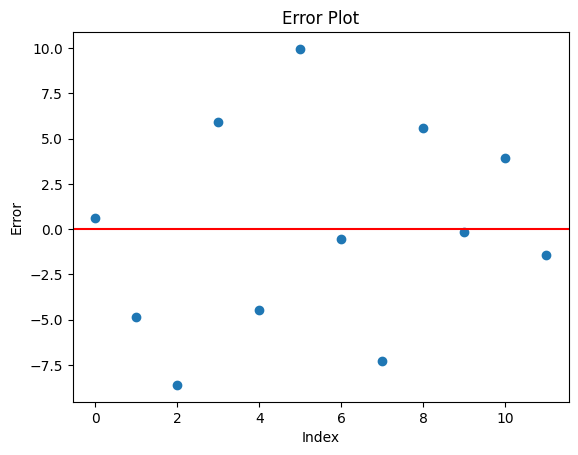

In [33]:
# Plot errors
plt.scatter(range(len(testSet['error'])), testSet['error'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(testSet['Wage'], testSet['predictedTest']))
print("RMSE:", rmse)

RMSE: 5.432256405746362


In [35]:
# RMSE with respect to mean of train set wage
meanTrainWage = np.mean(testSet['Wage'])
rmseMean = np.sqrt(mean_squared_error(testSet['Wage'], [meanTrainWage] * len(testSet['Wage'])))
print("RMSE with respect to mean of train set wage:", rmseMean)

RMSE with respect to mean of train set wage: 5.74134052049016


In [36]:
def wageModel5Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['agePower2'] = df.apply(lambda row: row['Age'] * row['Age'], axis=1)
    dfTransformer = sm.add_constant(df[['Educ','Age', 'agePower2']],has_constant='add')
    return dfTransformer

In [37]:
# Lets include Education
trainModel2 = sm.OLS(
  trainSet["Wage"],
  wageModel5Transformer(trainSet)
)
trainModel2Fit = trainModel2.fit()
print(trainModel2Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.77e-25
Time:                        20:41:01   Log-Likelihood:                -173.21
No. Observations:                  68   AIC:                             354.4
Df Residuals:                      64   BIC:                             363.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.6458      3.274     -6.917      0.0

In [38]:
predictedTest2 = trainModel2Fit.predict(wageModel5Transformer(testSet))
testSet['predictedTest2'] = predictedTest2
testSet['error2']  = testSet['Wage'] - testSet['predictedTest2']
testSet


,Wage,Educ,Age,agePower2,predictedWage3,predictedTest,error,predictedTest2,error2
28,16.37,12,22,484.0,15.788477,15.742293,0.627707,15.900342,0.469658
64,18.28,8,70,4900.0,23.540161,23.156031,-4.876031,16.266245,2.013755
57,20.15,10,41,1681.0,28.410612,28.750289,-8.600289,22.989471,-2.839471
54,33.70,18,62,3844.0,27.796677,27.770654,5.929346,32.349383,1.350617
8,25.60,15,54,2916.0,29.833807,30.045178,-4.445178,30.254124,-4.654124
72,35.71,18,66,4356.0,25.945842,25.755855,9.954145,30.848911,4.861089
45,26.04,17,36,1296.0,26.302724,26.606873,-0.566873,30.261182,-4.221182
29,16.97,9,32,1024.0,23.992211,24.233988,-7.263988,18.388733,-1.418733
44,24.26,20,25,625.0,18.613715,18.673724,5.586276,28.188587,-3.928587
73,24.74,14,33,1089.0,24.621856,24.882055,-0.142055,25.192011,-0.452011


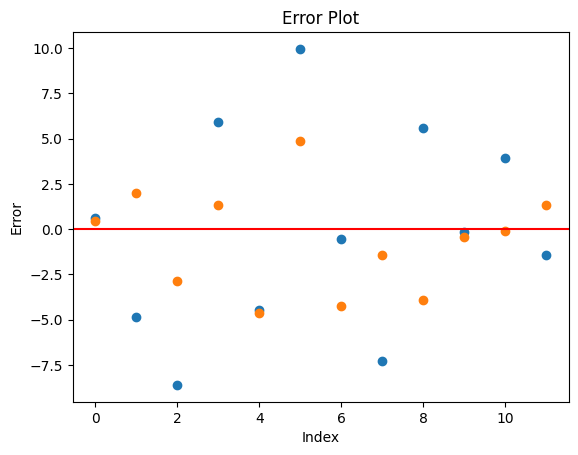

In [39]:
# Plot errors
plt.scatter(range(len(testSet['error'])), testSet['error'])
plt.scatter(range(len(testSet['error2'])), testSet['error2'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()


In [40]:
rmse2 = np.sqrt(mean_squared_error(testSet['Wage'], testSet['predictedTest2']))
print("RMSE:", rmse)
print("RMSE2:", rmse2)

RMSE: 5.432256405746362
RMSE2: 2.8400133060358015


In [41]:
print("RMSE with respect to mean of train set wage:", rmseMean)

RMSE with respect to mean of train set wage: 5.74134052049016


In [42]:
wage1SampleData = {
    "Educ": [12],
    "Age": [76]
}

In [43]:
def generalRegressionPredictor(self, transformedData):
    return self.predict(transformedData)

In [44]:
trainModel2Fit.transformer = wageModel5Transformer
trainModel2Fit.mainPredictor = partial(generalRegressionPredictor, trainModel2Fit)
registerAJrjModel(
    trainModel2Fit,
    {
        "modelName":f"zhuying_piao__to_predictModelBest",
        "version":"1.0.1",
        "params": trainModel2Fit.params.to_dict(),
        "score": -1 * rmse2,
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": trainModel2Fit.pvalues.to_dict(),
            "r_squared": float(trainModel2Fit.rsquared),
            "adj_r_squared": float(trainModel2Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g4/zhuying_piao__to_predictModelBest__1.0.1.pkl.zip


{'_id': '685c971df49b438a682e52d5',
 'modelName': 'zhuying_piao__to_predictModelBest',
 'version': '1.0.1',
 'params': {'const': -22.645849929449504,
  'Educ': 1.2648289422781942,
  'Age': 1.3605027543273607,
  'agePower2': -0.01355953658026225},
 'score': -2.8400133060358015,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 2.5984459912939652e-09,
   'Educ': 2.9132320681002193e-19,
   'Age': 1.624144145496897e-13,
   'agePower2': 2.4761159884350104e-13},
  'r_squared': 0.8384107429488208,
  'adj_r_squared': 0.8308362465245468},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 15479,
 'zippedModelSizeBytes': 6852,
 's3Url': '273-g4/zhuying_piao__to_predictModelBest__1.0.1.pkl.zip',
 'createdAt': '2025-06-26T00:41:01.315Z',
 'updatedAt': '2025-06-26T00:41:01.315Z'}

# K-Fold Cross validation

In [45]:
from sklearn.model_selection import KFold

In [46]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=55)


In [47]:
check = kf.split(wagesDf)
check
experiment = 1
# Loop through each fold
# Initialize variables to store results
bestModel = None
bestMse = 100000
mseScores = []
meanMseScores = []

for train_index, val_index in check:
    # Split the data
    trainSet, valSet = wagesDf.iloc[train_index], wagesDf.iloc[val_index]

    # Fit the model
    trainModel = sm.OLS(trainSet["Wage"], wageModel5Transformer(trainSet))
    trainModelFit = trainModel.fit()

    # Predict on the validation set
    val_predictions = trainModelFit.predict(wageModel5Transformer(valSet))

    # Calculate the mean squared error
    mse = mean_squared_error(valSet["Wage"], val_predictions)
    meanMse = mean_squared_error(valSet["Wage"], [np.mean(valSet["Wage"])] * len(valSet["Wage"]))
    mseScores.append(mse)
    meanMseScores.append(meanMse)
    if mse < bestMse:
        bestMse = mse
        bestModel = trainModelFit

    # Print summary for each fold (optional)
    print(f'expr={experiment}')
    experiment = experiment +1
    print(trainModelFit.summary())

expr=1
                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     97.45
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.92e-23
Time:                        20:41:01   Log-Likelihood:                -162.87
No. Observations:                  64   AIC:                             333.7
Df Residuals:                      60   BIC:                             342.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2984      3.562     -6.261  

In [48]:
mseScores,meanMseScores

([8.610749801253307,
  9.323363820814535,
  14.593977538637942,
  13.728883247357228,
  4.300270395424371],
 [46.270987500000004,
  67.21752460937499,
  70.4994234375,
  45.60951250000001,
  35.588746484375])

In [49]:
rmseScores = np.sqrt(mseScores)
rmeanMseScores = np.sqrt(meanMseScores)
rmseScores,rmeanMseScores

(array([2.93440791, 3.05341838, 3.82020648, 3.70525077, 2.07370933]),
 array([6.80227811, 8.19862943, 8.39639348, 6.75348151, 5.96563043]))

In [50]:
# Calculate average MSE
averageMse = sum(mseScores) / len(mseScores)
averageMseMean = sum(meanMseScores) / len(mseScores)
print(f"Average MSE across all folds: {averageMse}")
print(f"Average MSE Mean across all folds: {averageMseMean}")
print(f"Average RMSE across all folds: {pow(averageMse, 0.5)}")
print(f"Average RMSE Mean across all folds: {pow(averageMseMean, 0.5)}")

Average MSE across all folds: 10.111448960697476
Average MSE Mean across all folds: 53.03723890625
Average RMSE across all folds: 3.179850462002494
Average RMSE Mean across all folds: 7.282667018767919


In [51]:
bestModel.transformer = wageModel5Transformer
bestModel.mainPredictor = partial(generalRegressionPredictor, bestModel)
registerAJrjModel(
    bestModel,
    {
        "modelName":f"zhuying_piao__to_predictModelBestCrossValidation",
        "version":"1.0.1",
        "params": bestModel.params.to_dict(),
        "score": -1 * bestMse,
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": bestModel.pvalues.to_dict(),
            "r_squared": float(bestModel.rsquared),
            "adj_r_squared": float(bestModel.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g4/zhuying_piao__to_predictModelBestCrossValidation__1.0.1.pkl.zip


{'_id': '685c971df49b438a682e52d6',
 'modelName': 'zhuying_piao__to_predictModelBestCrossValidation',
 'version': '1.0.1',
 'params': {'const': -23.1219128218587,
  'Educ': 1.2557122360809507,
  'Age': 1.3692749585159185,
  'agePower2': -0.013452999193583797},
 'score': -4.300270395424371,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 9.211959760766723e-09,
   'Educ': 4.3966477974298085e-17,
   'Age': 5.81918612091756e-12,
   'agePower2': 2.5305737592157277e-11},
  'r_squared': 0.8240394850848566,
  'adj_r_squared': 0.8152414593390994},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 14903,
 'zippedModelSizeBytes': 6525,
 's3Url': '273-g4/zhuying_piao__to_predictModelBestCrossValidation__1.0.1.pkl.zip',
 'createdAt': '2025-06-26T00:41:01.637Z',
 'updatedAt': '2025-06-26T00:41:01.637Z'}